### Problem statement:

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. To analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
cfile= pd.read_csv("train_churn.csv")
tdata=pd.read_csv("test.csv")
sample=pd.read_csv("sample.csv")
dict=pd.read_csv("data_dictionary.csv")

In [114]:
pd.set_option('display.max_columns', 500)

### Data Understanding

In [115]:
cfile.shape

(69999, 172)

In [116]:
cfile.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [117]:
dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [118]:
cfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [119]:
cfile.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [120]:
cfile.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [121]:
cfile_missing_columns = (round(((cfile.isnull().sum()/len(cfile.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
cfile_missing_columns

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [122]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(cfile_missing_columns.index[cfile_missing_columns['null'] > 30])

In [123]:
# Deleting th columns that have more tha 30% missing values
cfile = cfile.drop(col_list_missing_30, axis=1)

In [124]:
cfile.shape

(69999, 142)

In [125]:
cfile_missing_columns = (round(((cfile.isnull().sum()/len(cfile.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
cfile_missing_columns.head(50)

,null
roam_og_mou_8,5.29
og_others_8,5.29
spl_og_mou_8,5.29
loc_ic_t2t_mou_8,5.29
loc_og_t2m_mou_8,5.29
loc_og_t2c_mou_8,5.29
loc_ic_t2m_mou_8,5.29
loc_og_t2t_mou_8,5.29
loc_ic_t2f_mou_8,5.29
std_og_t2f_mou_8,5.29


In [126]:
# Listing the columns of MOU Aug(8)
print(((cfile_missing_columns[cfile_missing_columns['null'] == 5.29]).index).to_list())

['roam_og_mou_8', 'og_others_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2c_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2f_mou_8', 'loc_ic_mou_8', 'isd_og_mou_8', 'roam_ic_mou_8', 'std_ic_t2t_mou_8', 'loc_og_mou_8', 'offnet_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8', 'std_ic_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2o_mou_8', 'std_og_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'std_og_t2c_mou_8', 'isd_ic_mou_8', 'std_og_t2m_mou_8', 'ic_others_8', 'loc_og_t2f_mou_8']


In [127]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
cfile_null_mou_8 = cfile[(cfile['loc_og_t2m_mou_8'].isnull()) & (cfile['loc_ic_t2f_mou_8'].isnull()) & (cfile['roam_og_mou_8'].isnull()) & (cfile['std_ic_t2m_mou_8'].isnull()) &
  (cfile['loc_og_t2t_mou_8'].isnull()) & (cfile['std_ic_t2t_mou_8'].isnull()) & (cfile['loc_og_t2f_mou_8'].isnull()) & (cfile['loc_ic_mou_8'].isnull()) &
  (cfile['loc_og_t2c_mou_8'].isnull()) & (cfile['loc_og_mou_8'].isnull()) & (cfile['std_og_t2t_mou_8'].isnull()) & (cfile['roam_ic_mou_8'].isnull()) &
  (cfile['loc_ic_t2m_mou_8'].isnull()) & (cfile['std_og_t2m_mou_8'].isnull()) & (cfile['loc_ic_t2t_mou_8'].isnull()) & (cfile['std_og_t2f_mou_8'].isnull()) & 
  (cfile['std_og_t2c_mou_8'].isnull()) & (cfile['og_others_8'].isnull()) & (cfile['std_og_mou_8'].isnull()) & (cfile['spl_og_mou_8'].isnull()) & 
  (cfile['std_ic_t2f_mou_8'].isnull()) & (cfile['isd_og_mou_8'].isnull()) & (cfile['std_ic_mou_8'].isnull()) & (cfile['offnet_mou_8'].isnull()) & 
  (cfile['isd_ic_mou_8'].isnull()) & (cfile['ic_others_8'].isnull()) & (cfile['std_ic_t2o_mou_8'].isnull()) & (cfile['onnet_mou_8'].isnull()) & 
  (cfile['spl_ic_mou_8'].isnull())]

cfile_null_mou_8.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
31,31,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,894.407,126.500,255.7,412.71,89.09,NaN,837.88,108.01,NaN,0.00,0.0,NaN,0.00,0.00,NaN,102.08,11.16,NaN,304.18,59.36,NaN,3.28,4.33,NaN,0.00,0.90,NaN,409.54,74.86,NaN,310.63,77.93,NaN,530.41,43.41,NaN,0.0,0.0,NaN,0.0,0.0,NaN,841.04,121.34,NaN,0.0,0.0,NaN,0.00,0.90,NaN,0.00,0.0,NaN,1250.59,197.11,0.0,3.08,0.30,NaN,18.09,0.61,NaN,1.64,0.0,NaN,22.83,0.91,NaN,14.33,0.08,NaN,6.06,0.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,20.39,0.08,NaN,43.43,0.99,0.0,0.19,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1,0,0,104,0,0,104,0,0,6/5/2014,NaN,NaN,104,0,0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,303,0.00,0.00,0.0,1
37,37,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,383.327,-5.000,0.0,54.41,NaN,NaN,780.21,NaN,NaN,2.86,NaN,NaN,15.74,NaN,NaN,5.39,NaN,NaN,23.43,NaN,NaN,0.00,NaN,NaN,1.26,NaN,NaN,28.83,NaN,NaN,46.91,NaN,NaN,727.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,774.36,NaN,NaN,0.0,NaN,NaN,19.43,NaN,NaN,0.58,NaN,NaN,823.21,0.00,0.0,19.24,NaN,NaN,17.93,NaN,NaN,0.00,NaN,NaN,37.18,NaN,NaN,21.79,NaN,NaN,13.21,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.01,NaN,NaN,72.19,0.00,0.0,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,6,2,1,366,0,0,110,0,0,6/14/2014,7/25/2014,8/10/2014,0,0,0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,482,0.00,0.00,0.0,0
41,41,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,53.997,131.395,0.0,37.75,166.74,NaN,1.50,78.26,NaN,0.00,0.0,NaN,0.00,1.15,NaN,0.00,0.01,NaN,0.00,6.06,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,6.08,NaN,37.75,166.73,NaN,1.50,65.11,NaN,0.0,0.0,NaN,0.0,0.0,NaN,39.25,231.84,NaN,0.0,0.0,NaN,0.00,5.93,NaN,0.00,0.0,NaN,39.25,243.86,0.0,0.00,5.31,NaN,0.00,6.08,NaN,0.00,0.0,NaN,0.00,11.39,NaN,0.00,2.29,NaN,5.30,13.38,NaN,0.0,0.0,NaN,0.0,0.0,NaN,5.30,15.68,NaN,5.30,27.08,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2,10,3,66,140,0,36,30,0,6/30/2014,7/31/2014,8/29/2014,36,0,0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,194,0.00,0.00,0.0,1
59,59,109,0.0,0.0,0.0

In [128]:
# Deleting the records for which MOU for Aug(8) are null
cfile = cfile.drop(cfile_null_mou_8.index)

In [129]:
cfile_missing_columns = (round(((cfile.isnull().sum()/len(cfile.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
cfile_missing_columns

,null
loc_ic_t2f_mou_6,2.83
roam_og_mou_6,2.83
std_og_t2c_mou_6,2.83
loc_ic_t2m_mou_6,2.83
loc_og_t2m_mou_6,2.83
...,...
total_og_mou_6,0.00
og_others_8,0.00
spl_og_mou_8,0.00
isd_og_mou_8,0.00


In [130]:
# Listing the columns of MOU Jun(6)
print(((cfile_missing_columns[cfile_missing_columns['null'] == 2.83]).index).to_list())

['loc_ic_t2f_mou_6', 'roam_og_mou_6', 'std_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'og_others_6', 'loc_og_mou_6', 'spl_og_mou_6', 'std_og_t2t_mou_6', 'isd_og_mou_6', 'std_og_t2m_mou_6', 'std_og_mou_6', 'isd_ic_mou_6', 'std_og_t2f_mou_6', 'loc_ic_mou_6', 'loc_og_t2t_mou_6', 'onnet_mou_6', 'std_ic_t2m_mou_6', 'std_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2f_mou_6', 'offnet_mou_6', 'std_ic_t2o_mou_6', 'ic_others_6', 'spl_ic_mou_6', 'roam_ic_mou_6']


In [131]:
# Similarly creatng a data frame
cfile_null_mou_6 = cfile[(cfile['loc_og_t2m_mou_6'].isnull()) & (cfile['loc_ic_t2f_mou_6'].isnull()) & (cfile['roam_og_mou_6'].isnull()) & (cfile['std_ic_t2m_mou_6'].isnull()) &
  (cfile['loc_og_t2t_mou_6'].isnull()) & (cfile['std_ic_t2t_mou_6'].isnull()) & (cfile['loc_og_t2f_mou_6'].isnull()) & (cfile['loc_ic_mou_6'].isnull()) &
  (cfile['loc_og_t2c_mou_6'].isnull()) & (cfile['loc_og_mou_6'].isnull()) & (cfile['std_og_t2t_mou_6'].isnull()) & (cfile['roam_ic_mou_6'].isnull()) &
  (cfile['loc_ic_t2m_mou_6'].isnull()) & (cfile['std_og_t2m_mou_6'].isnull()) & (cfile['loc_ic_t2t_mou_6'].isnull()) & (cfile['std_og_t2f_mou_6'].isnull()) & 
  (cfile['std_og_t2c_mou_6'].isnull()) & (cfile['og_others_6'].isnull()) & (cfile['std_og_mou_6'].isnull()) & (cfile['spl_og_mou_6'].isnull()) & 
  (cfile['std_ic_t2f_mou_6'].isnull()) & (cfile['isd_og_mou_6'].isnull()) & (cfile['std_ic_mou_6'].isnull()) & (cfile['offnet_mou_6'].isnull()) & 
  (cfile['isd_ic_mou_6'].isnull()) & (cfile['ic_others_6'].isnull()) & (cfile['std_ic_t2o_mou_6'].isnull()) & (cfile['onnet_mou_6'].isnull()) & 
  (cfile['spl_ic_mou_6'].isnull())]

cfile_null_mou_6.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
26,26,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,36.344,104.570,NaN,2.86,1.75,NaN,28.66,86.83,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.83,0.00,NaN,0.00,5.76,NaN,0.00,0.50,NaN,0.0,0.00,NaN,0.83,6.26,NaN,2.03,1.75,NaN,28.66,80.56,NaN,0.0,0.00,NaN,0.0,0.0,NaN,30.69,82.31,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0.0,31.53,88.58,NaN,0.00,0.00,NaN,2.91,6.94,NaN,0.00,1.64,NaN,2.91,8.59,NaN,0.00,0.00,NaN,0.15,2.30,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.15,2.30,0.0,3.06,10.89,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.0,1,3,11,0,50,110,0,20,30,6/14/2014,7/29/2014,8/30/2014,0,20,20,0.0,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1276,0.0,0.0,0.0,0
33,33,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,438.077,0.000,213.781,NaN,NaN,0.00,NaN,NaN,2.68,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,2.68,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,2.68,NaN,NaN,0.0,0.0,0.00,2.68,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,1,3,2,505,0,252,505,0,252,6/8/2014,7/27/2014,8/31/2014,505,0,252,0.0,0.00,0.0,756.47,0.00,74.29,0,0,0,0,0,0,1,0,1,0,0,0,457,0.0,0.0,0.0,1
95,95,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,46.770,187.134,NaN,3.36,18.26,NaN,21.03,186.86,NaN,0.00,0.0,NaN,0.00,0.0,NaN,3.36,18.26,NaN,18.96,151.41,NaN,2.06,35.44,NaN,0.0,0.00,NaN,24.39,205.13,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1.85,0.00,NaN,0.0,0.0,0.0,26.24,205.13,NaN,0.00,22.96,NaN,100.31,260.69,NaN,0.00,8.61,NaN,100.31,292.28,NaN,0.00,0.00,NaN,0.00,1.25,NaN,0.0,4.56,NaN,0.0,0.0,NaN,0.00,5.81,0.0,100.31,298.09,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.0,0,1,2,0,0,250,0,0,250,NaN,7/27/2014,8/25/2014,0,0,0,0.0,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,3234,0.0,0.0,0.0,0
135,135,109,0.0,0.0,0.0,6/30/2014

In [132]:
# Deleting the records for which MOU for Jun(6) are null
cfile= cfile.drop(cfile_null_mou_6.index)

In [133]:
cfile_missing_columns = (round(((cfile.isnull().sum()/len(cfile.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
cfile_missing_columns

,null
date_of_last_rech_8,1.71
loc_ic_t2t_mou_7,0.90
spl_ic_mou_7,0.90
loc_og_t2m_mou_7,0.90
og_others_7,0.90
...,...
std_og_t2c_mou_6,0.00
std_og_t2f_mou_8,0.00
std_og_t2f_mou_6,0.00
std_og_t2m_mou_8,0.00


In [134]:
# Listing the columns of MOU Jul(7)
print(((cfile_missing_columns[cfile_missing_columns['null'] == 0.90]).index).to_list())

['loc_ic_t2t_mou_7', 'spl_ic_mou_7', 'loc_og_t2m_mou_7', 'og_others_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'spl_og_mou_7', 'loc_og_t2c_mou_7', 'std_ic_t2m_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'ic_others_7', 'isd_og_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'roam_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_mou_7', 'onnet_mou_7', 'std_og_t2c_mou_7', 'offnet_mou_7']


In [135]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
cfile_null_mou_7 = cfile[(cfile['loc_og_t2m_mou_7'].isnull()) & (cfile['loc_ic_t2f_mou_7'].isnull()) & (cfile['roam_og_mou_7'].isnull()) & (cfile['std_ic_t2m_mou_7'].isnull()) &
  (cfile['loc_og_t2t_mou_7'].isnull()) & (cfile['std_ic_t2t_mou_7'].isnull()) & (cfile['loc_og_t2f_mou_7'].isnull()) & (cfile['loc_ic_mou_7'].isnull()) &
  (cfile['loc_og_t2c_mou_7'].isnull()) & (cfile['loc_og_mou_7'].isnull()) & (cfile['std_og_t2t_mou_7'].isnull()) & (cfile['roam_ic_mou_7'].isnull()) &
  (cfile['loc_ic_t2m_mou_7'].isnull()) & (cfile['std_og_t2m_mou_7'].isnull()) & (cfile['loc_ic_t2t_mou_7'].isnull()) & (cfile['std_og_t2f_mou_7'].isnull()) & 
  (cfile['std_og_t2c_mou_7'].isnull()) & (cfile['og_others_7'].isnull()) & (cfile['std_og_mou_7'].isnull()) & (cfile['spl_og_mou_7'].isnull()) & 
  (cfile['std_ic_t2f_mou_7'].isnull()) & (cfile['isd_og_mou_7'].isnull()) & (cfile['std_ic_mou_7'].isnull()) & (cfile['offnet_mou_7'].isnull()) & 
  (cfile['isd_ic_mou_7'].isnull()) & (cfile['ic_others_7'].isnull()) & (cfile['std_ic_t2o_mou_7'].isnull()) & (cfile['onnet_mou_7'].isnull()) & 
  (cfile['spl_ic_mou_7'].isnull())]
cfile_null_mou_7.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
54,54,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,161.149,30.278,8.713,0.80,NaN,0.00,0.00,NaN,0.55,0.00,NaN,0.00,0.00,NaN,0.0,0.80,NaN,0.00,0.00,NaN,0.55,0.0,NaN,0.0,0.00,NaN,0.00,0.80,NaN,0.55,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,4.63,NaN,0.00,1.43,NaN,0.0,6.86,0.0,0.55,0.78,NaN,0.00,3.14,NaN,0.45,0.46,NaN,0.00,4.39,NaN,0.45,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.00,4.39,0.0,0.45,0.0,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.0,16,3,3,181,34,10,25,17,10,6/28/2014,7/10/2014,8/24/2014,17,0,10,19.05,0.74,0.0,1209.28,115.81,0.0,0,0,0,10,2,0,0,0,0,0,0,0,730,0.0,68.8,167.17,0
118,118,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,219.956,0.000,305.372,217.59,NaN,313.98,1.96,NaN,3.78,0.55,NaN,0.00,10.33,NaN,0.0,0.94,NaN,1.03,1.96,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.16,2.91,NaN,1.03,206.31,NaN,312.94,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.0,206.31,NaN,312.94,0.0,NaN,0.0,0.00,NaN,7.16,0.00,NaN,0.0,209.23,0.0,321.14,5.28,NaN,9.41,5.03,NaN,0.84,0.00,NaN,0.00,10.31,NaN,10.26,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.00,10.31,0.0,10.53,0.0,NaN,0.26,0.00,NaN,0.0,0.00,NaN,0.0,10,5,11,242,0,336,41,0,36,6/29/2014,7/25/2014,8/31/2014,0,0,30,5.68,0.00,0.0,224.47,0.00,0.0,0,0,0,0,0,0,0,0,0,2,0,0,1036,0.0,0.0,0.00,0
189,189,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,250.346,0.390,17.388,43.29,NaN,0.00,117.26,NaN,1.50,19.73,NaN,2.88,51.29,NaN,1.5,4.11,NaN,0.00,42.78,NaN,0.00,0.0,NaN,0.0,1.18,NaN,0.00,46.89,NaN,0.00,25.81,NaN,0.00,36.54,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.0,62.36,NaN,0.00,0.0,NaN,0.0,0.63,NaN,0.00,1.26,NaN,0.0,111.16,0.0,0.00,0.00,NaN,0.00,25.66,NaN,0.00,0.00,NaN,0.00,25.66,NaN,0.00,3.66,NaN,0.00,19.58,NaN,0.00,0.0,NaN,0.0,0.0,NaN,0.0,23.24,NaN,0.00,48.91,0.0,0.00,0.0,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.0,13,5,3,269,0,30,50,0,30,6/27/2014,7/30/2014,8/28/2014,30,0,0,0.00,0.00,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1416,0.0,0

In [136]:
cfile = cfile.drop(cfile_null_mou_7.index)

In [137]:
cfile_missing_columns = (round(((cfile.isnull().sum()/len(cfile.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
cfile_missing_columns

,null
date_of_last_rech_8,1.68
date_of_last_rech_6,0.80
date_of_last_rech_7,0.72
total_ic_mou_6,0.00
total_ic_mou_7,0.00
...,...
std_og_t2m_mou_6,0.00
std_og_t2t_mou_8,0.00
std_og_t2t_mou_7,0.00
std_og_t2t_mou_6,0.00


In [138]:
print(((cfile_missing_columns[cfile_missing_columns['null'] == 1.68]).index).to_list())

['date_of_last_rech_8']


In [139]:
cfile_last_rech_8 = cfile[(cfile['date_of_last_rech_8'].isnull()) ]

In [140]:
cfile_last_rech_8.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
115,115,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,554.907,204.238,207.556,76.23,102.86,141.39,399.19,190.51,193.39,0.00,0.00,0.00,0.00,0.00,0.00,76.23,102.86,141.39,326.69,170.34,184.56,25.66,2.28,3.13,0.0,0.00,0.00,428.59,275.49,329.09,0.00,0.00,0.0,30.76,7.65,2.85,15.86,10.23,2.84,0.0,0.0,0.0,46.63,17.88,5.69,0.2,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,475.43,293.38,334.79,55.21,51.61,74.11,328.73,161.94,187.64,30.14,18.74,14.51,414.09,232.31,276.28,0.00,2.26,0.00,66.54,22.63,76.21,22.71,16.88,0.03,0.0,0.0,0.0,89.26,41.78,76.24,699.93,402.34,465.64,0.00,0.00,0.0,196.56,128.24,113.11,0.0,0.0,0.00,2,1,0,252,0,0,252,0,0,6/19/2014,7/15/2014,NaN,252,0,0,1.18,0.0,0.0,161.8,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,2949,0.0,195.45,95.4,0
127,127,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,169.857,146.435,68.560,22.29,14.31,3.61,149.29,123.91,54.96,5.93,16.39,9.51,118.06,58.98,3.76,4.31,10.69,3.61,9.28,18.08,3.43,0.00,0.00,0.00,0.0,2.35,0.00,13.59,28.78,7.04,4.06,0.76,0.0,28.13,37.96,47.76,0.00,0.00,0.00,0.0,0.0,0.0,32.19,38.73,47.76,0.0,0.0,0.0,7.73,11.73,0.00,0.00,0.0,0.0,53.53,79.24,54.81,0.00,2.36,0.63,13.31,38.68,2.39,0.00,0.25,0.00,13.31,41.29,3.03,11.38,0.00,0.83,7.64,47.48,8.41,0.00,0.00,0.00,0.0,0.0,0.0,19.03,47.48,9.24,33.43,88.78,14.19,0.00,0.00,0.0,1.08,0.00,0.00,0.0,0.0,1.91,3,4,0,220,330,0,110,110,0,6/10/2014,7/25/2014,NaN,110,110,0,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2477,0.0,0.00,0.0,0
138,138,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1.490,216.837,4.200,0.00,0.00,0.00,1.55,3.11,0.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.55,1.35,0.79,0.00,0.00,0.00,0.0,0.00,0.00,1.55,1.35,0.79,0.00,0.00,0.0,0.00,1.76,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,1.76,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1.55,3.11,0.79,0.00,0.00,0.73,0.65,0.90,1.04,0.00,0.00,0.00,0.65,0.90,1.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.65,0.90,1.96,0.00,0.00,0

In [141]:
cfile = cfile.drop(cfile_last_rech_8.index)

In [142]:
cfile_missing_columns = (round(((cfile.isnull().sum()/len(cfile.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
cfile_missing_columns

,null
date_of_last_rech_6,0.77
date_of_last_rech_7,0.65
id,0.00
spl_ic_mou_8,0.00
std_ic_mou_8,0.00
...,...
std_og_t2m_mou_6,0.00
std_og_t2t_mou_8,0.00
std_og_t2t_mou_7,0.00
std_og_t2t_mou_6,0.00


In [143]:
print(((cfile_missing_columns[cfile_missing_columns['null'] == 0.77]).index).to_list())

['date_of_last_rech_6']


In [35]:
cfile_last_rech_6 = cfile[(cfile['date_of_last_rech_6'].isnull()) ]

In [36]:
cfile = cfile.drop(cfile_last_rech_6.index)

In [37]:
print(((cfile_missing_columns[cfile_missing_columns['null'] == 0.65]).index).to_list())

['date_of_last_rech_7']


In [38]:
cfile_last_rech_7 = cfile[(cfile['date_of_last_rech_7'].isnull()) ]

In [39]:
cfile = cfile.drop(cfile_last_rech_7.index)

In [145]:
cfile_missing_columns = (round(((cfile.isnull().sum()/len(cfile.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
cfile_missing_columns

,null
date_of_last_rech_6,0.77
date_of_last_rech_7,0.65
id,0.00
spl_ic_mou_8,0.00
std_ic_mou_8,0.00
...,...
std_og_t2m_mou_6,0.00
std_og_t2t_mou_8,0.00
std_og_t2t_mou_7,0.00
std_og_t2t_mou_6,0.00


In [146]:
cfile.shape

(62769, 142)

In [147]:
# List the date columns
date_cols = [k for k in cfile.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [148]:
# Dropping date columns as it is not required
cfile = cfile.drop(date_cols, axis=1)

In [149]:
cfile['churn'] = np.where((cfile['total_ic_mou_8']==0) & (cfile['total_og_mou_8']==0) & (cfile['vol_2g_mb_8']==0) & (cfile['vol_3g_mb_8']==0), 1, 0)

In [150]:
cfile.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93

In [151]:
round(100*(cfile['churn'].mean()),2)

3.16

- It seems the churn percentage is less

In [152]:
cfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62769 entries, 0 to 69998
Columns: 137 entries, id to churn
dtypes: float64(108), int32(1), int64(28)
memory usage: 65.8 MB


In [153]:
cfile.shape

(62769, 137)

In [166]:
numericdata=cfile.copy()

In [167]:
# List the columns of total mou, rech_num and rech_amt
[total for total in numericdata.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [171]:
numericdata['total_mou_good'] = (numericdata['total_og_mou_6'] + numericdata['total_ic_mou_6'])

In [172]:
numericdata['total_mou_good']

0         93.05
1          3.44
2        180.78
3        171.14
4         84.80
          ...  
69994      0.00
69995    246.45
69996    954.86
69997     58.61
69998      8.13
Name: total_mou_good, Length: 62769, dtype: float64

In [173]:
numericdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,avg_mou_action,total_mou_good
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,159.455,93.05
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,63.435,3.44
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,0,84.915,180.78
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,

In [174]:
numericdata['avg_mou_action'] = (numericdata['total_og_mou_7'] + numericdata['total_og_mou_8'] + numericdata['total_ic_mou_7'] + numericdata['total_ic_mou_8'])/2

In [175]:
numericdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,avg_mou_action,total_mou_good
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,159.455,93.05
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,63.435,3.44
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,0,84.915,180.78
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,

In [176]:
numericdata['diff_mou'] = numericdata['avg_mou_action'] - numericdata['total_mou_good']

In [177]:
numericdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,avg_mou_action,total_mou_good,diff_mou
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,159.455,93.05,66.405
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,63.435,3.44,59.995
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,0,84.915,180.78,-95.865
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.

In [179]:
numericdata['decrease_mou_action'] = np.where((numericdata['diff_mou'] < 0), 1, 0)

In [180]:
numericdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,avg_mou_action,total_mou_good,diff_mou,decrease_mou_action
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,159.455,93.05,66.405,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,63.435,3.44,59.995,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,0,84.915,180.78,-95.865,1
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0

In [181]:
# Avg rech number at action phase
numericdata['avg_rech_num_action'] = (numericdata['total_rech_num_7'] + numericdata['total_rech_num_8'])/2

In [182]:
# Similaryly deriving new colums

In [183]:
numericdata['diff_rech_num'] = numericdata['avg_rech_num_action'] - numericdata['total_rech_num_6']

In [184]:
# similarly Checking if rech_num has decreased in action phase
numericdata['decrease_rech_num_action'] = np.where((numericdata['diff_rech_num'] < 0), 1, 0)

In [185]:
numericdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,avg_mou_action,total_mou_good,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,159.455,93.05,66.405,0,2.0,-1.0,1
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,63.435,3.44,59.995,0,4.5,1.5,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,0,84.915,180.78,-95.865,1,3.0,1.

- Deriving new column decrease_arpu_action

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [186]:
numericdata['avg_arpu_action'] = (numericdata['arpu_7'] + numericdata['arpu_8'])/2

In [187]:
numericdata['diff_arpu'] = numericdata['avg_arpu_action'] - numericdata['arpu_6']

In [188]:
numericdata['decrease_arpu_action'] = np.where(numericdata['diff_arpu'] < 0, 1, 0)
numericdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,avg_mou_action,total_mou_good,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_arpu_action,diff_arpu,decrease_arpu_action
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,159.455,93.05,66.405,0,2.0,-1.0,1,47.2680,15.9910,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,63.435,3.44,59.995,0,4.5,1.5,0,82.8700,82.8700,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,

- Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [189]:
# VBC in action phase
numericdata['avg_vbc_3g_action'] = (numericdata['jul_vbc_3g'] + numericdata['aug_vbc_3g'])/2

In [190]:
numericdata['diff_vbc'] = numericdata['avg_vbc_3g_action'] - numericdata['jun_vbc_3g']

In [191]:
numericdata['decrease_vbc_action'] = np.where(numericdata['diff_vbc'] < 0 , 1, 0)

In [192]:
numericdata.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,avg_mou_action,total_mou_good,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0,159.455,93.05,66.405,0,2.0,-1.0,1,47.2680,15.9910,0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0,63.435,3.44,59.995,0,4.5,1.5,0,82.8700,82.8700,0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0

In [205]:
# Deriving decrease_rech_amt_action
#Column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [206]:
numericdata['avg_rech_amt_action'] = (numericdata['total_rech_amt_7'] + numericdata['total_rech_amt_8'])/2

In [207]:
numericdata['diff_rech_amt'] = numericdata['avg_rech_amt_action'] - numericdata['total_rech_amt_6']

In [208]:
numericdata['decrease_rech_amt_action'] = np.where((numericdata['diff_rech_amt'] < 0), 1, 0) 

### EDA
- Univariate Analysis

In [193]:
numericdata['churn'] = numericdata['churn'].astype('int64')

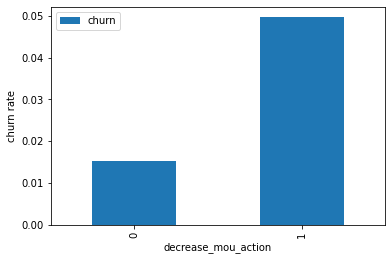

In [194]:
numericdata.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

__Churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.__

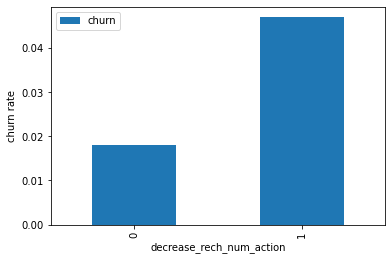

In [195]:
numericdata.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

- Churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

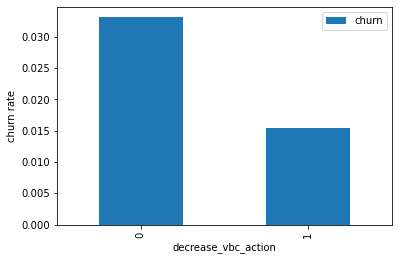

In [196]:
numericdata.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here we see churn rate is more for the customers, whose volume based cost in action month is increased. Which means the customers do not do the monthly recharge more when they are in the action phase.

- Analysis of the average revenue per customer (irrespective of churn or not churn) during the action phase

In [197]:
# Creating churn dataframe
data_churn = numericdata[numericdata['churn'] == 1]
# Creating not churn dataframe
data_non_churn = numericdata[numericdata['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

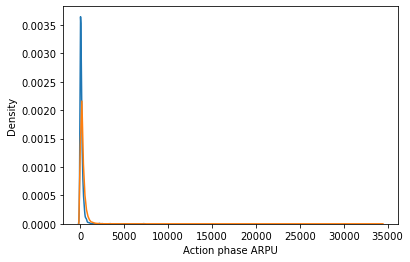

In [203]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

In [201]:
# Higher ARPU is less likely to be churned

[Text(0.5, 0, 'Action phase MOU')]

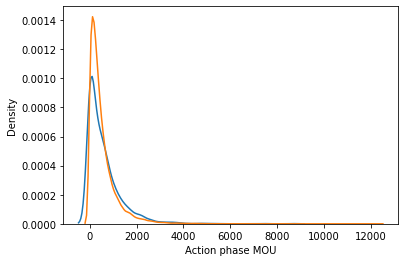

In [202]:
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

- Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

#### Bivariate analysis

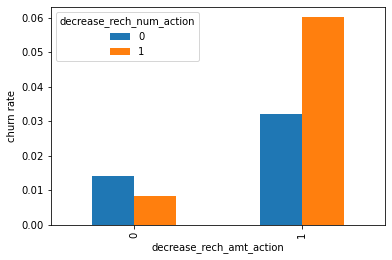

In [209]:
#Analysis of churn rate

numericdata.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

- the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

In [211]:
#Decreasing recharge amount Vs volume based cost in the action phase

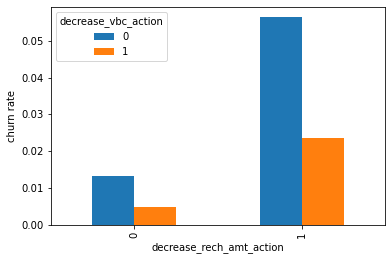

In [212]:
numericdata.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

- churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.



In [215]:
#dropping few derived columns which aren't required for furher analysis

numericdata = numericdata.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'], axis=1)

### Create X, y and then Train test split

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [218]:
X = numericdata.drop(['churn'], axis=1)

In [219]:
y = numericdata['churn']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [222]:
# Initializing the scaler
# Instantiate the Scaler
scaler = StandardScaler()

In [224]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [225]:
X_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_arpu_action,decrease_vbc_action,decrease_rech_amt_action
60036,1.239743,0.0,0.0,0.0,0.0,0.885761,0.982150,1.604667,-0.086529,-0.048569,-0.006503,0.928933,1.019812,1.619878,0.170918,0.081973,-0.128597,0.764897,1.589602,-0.149279,0.044031,0.042047,0.269262,1.834259,1.897289,2.517662,1.242948,1.150185,0.770484,-0.193639,-0.188796,0.557354,1.276141,1.270533,1.763949,-0.242659,-0.184171,-0.158150,-0.304807,-0.277599,0.013533,3.466660,4.381314,17.307435,0.0,0.0,0.0,-0.286570,-0.214571,0.229862,-0.025771,-0.026099,-0.026919,-0.025616,-0.052560,0.312642,1.024258,-0.014878,-0.021095,0.464851,0.471623,1.114456,-0.150946,-0.077856,0.051754,2.811077,1.595628,2.504869,-0.121042,0.014793,0.235810,1.775020,0.993264,1.756066,-0.118299,-0.187178,-0.087800,-0.141253,-0.147821,0.157385,0.230225,0.392913,0.046301,0.0,0.0,0.0,-0.125664,-0.145739,0.090892,1.469645,0.760629,1.497814,0.684512,-0.238821,0.790944,-0.114757,-0.125227,-0.12822,-0.026682,-0.063698,-0.016688,0.593318,0.539815,0.185777,1.053759,1.398434,1.181321,0.031337,0.186274,0.245499,-0.682232,0.728189,0.629781,-0.247231,-0.24816,-0.240171,-0.237573,-0.24117,-0.249955,-0.276022,-0.282304,-0.279936,-0.266242,-0.27652,-0.286399,-0.203789,-0.198753,-0.214251,-0.13139,-0.131394,-0.129103,1.861384,-0.262457,-0.248433,-0.234074,-0.249107,0,1,0,0,0
69556,1.711467,0.0,0.0,0.0,0.0,1.120489,1.098319,1.742319,4.989055,4.373073,5.678277,-0.178806,-0.010505,0.225696,-0.174611,-0.122832,-0.128597,-0.188276,-0.165510,-0.149279,-0.107221,-0.090128,0.090222,-0.259132,-0.291010,-0.151264,-0.280089,-0.284245,-0.284709,-0.193639,-0.188796,-0.212613,-0.245892,-0.253766,-0.050485,5.977640,5.234353,6.700841,0.012932,0.207745,0.411657,-0.142683,-0.133729,-0.140118,0.0,0.0,0.0,3.870918,3.471271,4.564509,-0.025771,-0.026099,-0.026919,-0.240810,-0.259380,-0.280715,-0.120881,-0.014878,-0.021095,3.059499,2.782611,3.793532,-0.086184,-0.133817,0.010820,-0.516995,-0.370938,-0.307371,-0.306778,-0.273488,-0.305413,-0.441748,-0.365387,-0.249740,-

In [226]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_arpu_action,decrease_vbc_action,decrease_rech_amt_action
35868,0.042199,0.0,0.0,0.0,0.0,-0.646537,-0.723083,-0.694636,-0.314849,-0.357326,-0.310826,-0.543760,-0.529409,-0.463328,-0.174611,-0.122832,-0.128597,-0.188276,-0.165510,-0.149279,-0.053938,-0.136955,-0.118235,-0.422334,-0.422353,-0.328936,-0.280089,-0.262097,-0.119428,-0.193639,-0.188796,-0.212613,-0.319590,-0.364130,-0.284389,-0.317353,-0.323545,-0.281908,-0.336862,-0.341525,-0.322571,-0.142683,-0.133729,-0.140118,0.0,0.0,0.0,-0.430002,-0.437604,-0.398654,-0.025771,-0.026099,-0.026919,-0.240810,-0.25627,-0.270761,-0.120881,-0.014878,-0.021095,-0.541716,-0.568807,-0.493501,-0.059729,-0.158756,-0.218850,-0.409327,-0.560845,-0.393338,-0.306778,-0.276191,-0.305413,-0.355091,-0.503618,-0.434303,-0.187342,-0.187178,-0.102074,-0.219337,-0.246007,-0.204420,-0.125863,-0.137020,-0.128291,0.0,0.0,0.0,-0.282025,-0.301997,-0.225644,-0.432790,-0.573197,-0.482950,1.269088,-0.238821,4.076012,-0.114757,-0.125227,-0.12822,-0.067137,-0.074939,-0.080014,-0.681571,-0.990638,-0.637533,-0.447645,-0.811308,-0.486357,0.182532,-0.929467,0.131700,0.675674,-0.66159,0.629781,-0.247231,-0.24816,-0.240171,-0.237573,-0.24117,-0.249955,-0.276022,-0.282304,-0.279936,-0.266242,-0.27652,-0.286399,-0.203789,-0.198753,-0.214251,-0.13139,-0.131394,-0.129103,-0.909715,-0.262457,-0.248433,-0.234074,-0.249107,1,1,1,0,1
51304,0.807065,0.0,0.0,0.0,0.0,-0.852471,-0.674204,-0.553598,-0.448482,-0.399032,-0.283685,-0.624909,-0.378302,-0.538192,-0.156186,-0.044393,-0.128597,-0.182075,0.120973,0.750222,-0.313986,-0.287299,-0.245332,-0.574534,-0.139060,-0.601413,-0.280089,-0.284245,-0.284709,-0.193639,-0.188796,-0.212613,-0.572572,-0.284279,-0.541999,-0.317353,-0.323545,-0.315425,-0.341475,-0.341525,-0.328153,-0.142683,-0.133729,-0.140118,0.0,0.0,0.0,-0.433040,-0.437604,-0.423851,-0.025771,-0.026099,-0.026919,-0.240810,-0.25938,-0.280715,-0.120881,-0.014878,-0.021095,-0.682384,-0.527702,-0.648219,-0.345726,-0.325318,-0.352087,-0.645762,-0.64919

# PCA

In [228]:
from sklearn.decomposition import PCA

In [229]:
#initializing PCA
pca = PCA(random_state=42)

In [230]:
pca.fit(X_train)

PCA(random_state=42)

In [231]:
pca.components_

array([[ 1.22041416e-03, -5.55111512e-17,  2.22044605e-16, ...,
        -8.21993872e-04,  5.88385643e-03,  8.70380345e-04],
       [ 3.24897728e-03, -0.00000000e+00, -0.00000000e+00, ...,
         2.56892108e-03,  1.07388533e-02,  6.95922525e-04],
       [ 1.66651244e-04,  4.85722573e-17,  2.33103467e-18, ...,
        -4.39846508e-03,  3.17022719e-02, -4.06764015e-03],
       ...,
       [ 0.00000000e+00,  2.78580803e-03, -3.83576706e-02, ...,
         1.93204827e-16, -1.00613962e-16, -9.92451564e-17],
       [ 0.00000000e+00,  7.82175918e-02,  1.07810812e-01, ...,
        -6.76542156e-17,  1.04083409e-16, -6.93889390e-17],
       [-0.00000000e+00, -1.51869417e-01,  3.92656100e-01, ...,
         6.90094683e-17, -2.38524478e-17,  7.63278329e-17]])

In [232]:
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.13035304 0.20704032 0.25941524 0.3051885  0.34162015 0.37434406
 0.40319736 0.43046295 0.45516794 0.47908986 0.501873   0.52437558
 0.5462318  0.56773707 0.58792792 0.60549129 0.62186176 0.63625039
 0.65021492 0.66389954 0.67736232 0.69009593 0.70185819 0.71343238
 0.72356475 0.73348785 0.74306206 0.75202757 0.76063654 0.7685123
 0.77628108 0.78388518 0.7913231  0.79864263 0.80586066 0.81295682
 0.81953876 0.82607626 0.8323444  0.83846538 0.84451034 0.85050313
 0.85612776 0.86134909 0.86645945 0.8713842  0.87597198 0.88031811
 0.88459589 0.88876558 0.89279716 0.89678497 0.90067845 0.90451678
 0.90811449 0.91165301 0.91513642 0.91852589 0.92172824 0.9248928
 0.92802271 0.93110912 0.934068   0.93697945 0.93969931 0.94230377
 0.94481832 0.94727353 0.94967717 0.95204954 0.95441029 0.95669148
 0.95891236 0.9610999  0.96326683 0.96535578 0.96740395 0.96935182
 0.97126953 0.97316697 0.97498607 0.97674086 0.97842827 0.98003345
 0.98162061 0.98317737 0.98470522 0.98620918 0.98763396 0.988914

Text(0, 0.5, 'Cumulative Variance')

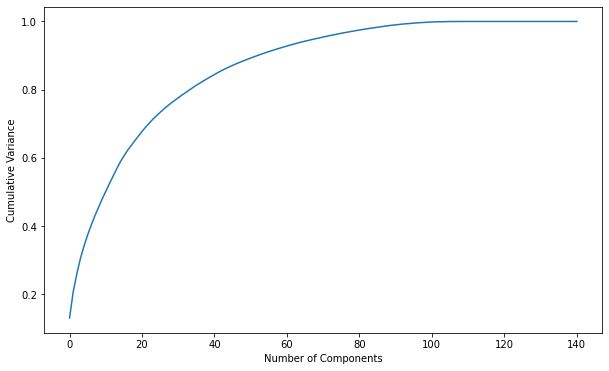

In [233]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

-60 components here explains 90% of the variance

### Performing PCA with 60 components

In [234]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [235]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [236]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [237]:
#transforming the test data
X_test_pca = pca_final.transform(X_test)

### Logistic regression with PCA

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

- Tuning hyperparameter C

In [240]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [241]:
# Creating KFold  5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}


model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [242]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.213684,0.099283,0.005721,0.005351,0.01,{'C': 0.01},0.549669,0.583871,0.559603,0.597598,0.537975,0.565743,0.021957,6,0.580492,0.563448,0.577320,0.556911,0.571772,0.569988,0.008730
1,0.385756,0.012553,0.003085,0.001678,0.1,{'C': 0.1},0.662252,0.712903,0.658940,0.720721,0.651899,0.681343,0.029257,5,0.699445,0.681564,0.687550,0.677236,0.699278,0.689015,0.009061
2,0.374966,0.024560,0.002390,0.001951,1,{'C': 1},0.745033,0.790323,0.721854,0.795796,0.721519,0.754905,0.032345,4,0.780333,0.767757,0.773989,0.753659,0.775461,0.770240,0.009212
3,0.442352,0.071625,0.006615,0.005299,10,{'C': 10},0.807947,0.809677,0.725166,0.846847,0.768987,0.791725,0.041403,2,0.808882,0.810854,0.816019,0.789431,0.805934,0.806224,0.009017
4,0.392891,0.030525,0.004920,0.005725,100,{'C': 100},0.811258,0.819355,0.728477,0.837838,0.768987,0.793183,0.039441,1,0.811261,0.818037,0.819984,0.792683,0.805934,0.809580,0.009812
5,0.399418,0.043196,0.005391,0.005710,1000,{'C': 1000},0.807947,0.816129,0.728477,0.831832,0.772152,0.791307,0.037013,3,0.812847,0.817239,0.818398,0.796748,0.807538,0.810554,0.007889


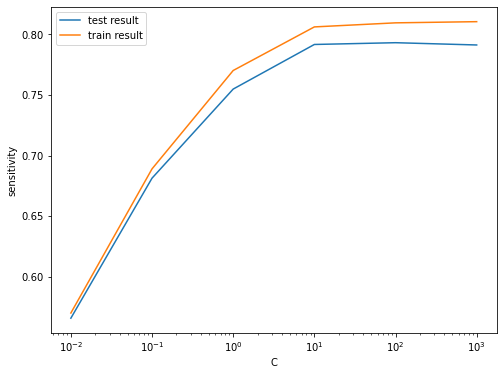

In [243]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [244]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.7931830235314831 at C = 100


In [247]:
# Logistic regression with optimal C
logistic_pca = LogisticRegression(C=best_C)

In [248]:
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [249]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [250]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[48385   267]
 [  305  1258]]


In [252]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [253]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9886089813800657
Sensitivity:- 0.8048624440179143
Specificity:- 0.9945120447258078


- Prediction on the test set

In [254]:
y_test_pred = log_pca_model.predict(X_test_pca)

In [255]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[12052    79]
 [   85   338]]


In [256]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [292]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9744304604110243
Sensitivity: 0.3512476007677543
Specificity: 0.9982528981336841


- Model summary

Train set <br>
Accuracy = 0.98 <br>
Sensitivity = 0.80 <br>
Specificity = 0.99<br>

Test set<br>
Accuracy = 0.97<br>
Sensitivity = 0.35<br>
Specificity = 0.99<br>

The model is performing well in the test set, the accuracy & specificity are good.

### Decision tree with PCA


In [259]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# initializing 
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)


grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [261]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.411591,0.053501,0.000000,0.000000,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.442308,0.410256,0.380192,0.405751,0.476038,0.422909,0.033101,5
1,1.463243,0.053415,0.002980,0.002434,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.442308,0.410256,0.380192,0.405751,0.476038,0.422909,0.033101,5
2,1.461013,0.051621,0.002984,0.002437,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.439103,0.352564,0.357827,0.376997,0.440895,0.393477,0.038850,7
3,1.423466,0.036301,0.007080,0.006128,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.439103,0.352564,0.357827,0.376997,0.440895,0.393477,0.038850,7
4,2.314911,0.157291,0.004122,0.006068,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.522436,0.429487,0.431310,0.440895,0.530351,0.470896,0.045548,1
5,2.383094,0.233250,0.007037,0.004357,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.522436,0.429487,0.431310,0.440895,0.530351,0.470896,0.045548,1
6,2.262827,0.143379,0.004929,0.005724,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.503205,0.352564,0.357827,0.421725,0.507987,0.428662,0.067388,4
7,2.276979,0.175188,0.007245,0.007078,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.503205,0.352564,0.357827,0.428115,0.507987,0.429940,0.067305,3


In [262]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.47089579749324156
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [263]:
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [265]:
#Making predictions
y_train_pred = dt_pca_model.predict(X_train_pca)

In [266]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[48337   315]
 [  676   887]]


In [267]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [268]:
#Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9802648610972817
Sensitivity:- 0.5674984005118362
Specificity:- 0.9935254460248294


In [270]:
#making predictions on test data
y_test_pred = dt_pca_model.predict(X_test_pca)

In [271]:
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [272]:
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9744304604110243
Sensitivity:- 0.5674984005118362
Specificity:- 0.9935254460248294


- Model summary

Train set <br>
Accuracy = 0.98 <br>
Sensitivity = 0.56 <br>
Specificity = 0.99<br>

Test set<br>
Accuracy = 0.97<br>
Sensitivity = 0.56<br>
Specificity = 0.99<br>
 
 
 The accuracy & specificity are fine.

#### Random Forest with PCA

In [281]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)


grid_search.fit(X_train_pca, y_train)
%%time 


Fitting 3 folds for each of 24 candidates, totalling 72 fits


UsageError: Line magic function `%%time` not found.


In [285]:
print(grid_search.best_score_,grid_search.best_params_)


0.9771382937684813 {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


- We get an accurancy of 0.977 using 'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100

### Model with optimal parameters

In [286]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [287]:
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [288]:
y_train_pred = rfc_model.predict(X_train_pca)

In [289]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[48567    85]
 [ 1014   549]]


In [290]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [291]:
print(metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print(TP / float(TP+FN))

# Specificity
print(TN / float(TN+FP))

0.9744304604110243
0.3512476007677543
0.9982528981336841


- Model summary

Train set <br>
Accuracy = 0.97 <br>
Sensitivity = 0.35 <br>
Specificity = 0.99<br>

Test set<br>
Accuracy = 0.97<br>
Sensitivity = 0.35<br>
Specificity = 0.99<br>

The accuracy & specificity are good.

### Logistic Regression

In [324]:
import statsmodels.api as sm

In [325]:
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [326]:
log_no_pca = log_no_pca.fit().summary()

In [327]:
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                50215
Model:                            GLM   Df Residuals:                    50083
Model Family:                Binomial   Df Model:                          131
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 26 Jan 2022   Deviance:                       95972.
Time:                        18:23:31   Pearson chi2:                 4.69e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.361e+15   6.23e+05  -3.79e+09      0.000   -2.36e+15   -2.36e+15
id                       -4.909e+11      3e+05  -1.64e+06      0.000   -4.91e+11   -4.91e+11
circle_id                 1.928e+08      0.415   4.65e+08      0.000    1.93e+08    1.93e+08
loc_og_t2o_mou           -7.453e+07      0.637  -1.17e+08      0.000   -7.45e+07   -7.45e+07
std_og_t2o_mou           -2.773e+08      0.841   -3.3e+08      0.000   -2.77e+08   -2.77e+08
loc_ic_t2o_mou            2.524e+08      0.591   4.27e+08      0.000    2.52e+08    2.52e+08
arpu_6                    9.787e+12   1.39e+06   7.03e+06      0.000    9.79e+12    9.79e+12
arpu_7                    -8.24e+13   1.55e+06  -5.33e+07      0.000   -8.24e+13   -8.24e+13
arpu_8                   -9.288e+13    1.5e+06  -6.21e+07      0.000   -9.29e+13   -9.29e+13
onnet_mou_6               9.187e+14   2.27e+07   4.04e+07      0.000    9.19e+14    9.19e+14
onnet_mou_7              -3.273e+14    1.9e+07  -1.72e+07      0.000   -3.27e+14   -3.27e+14
onnet_mou_8              -7.905e+14   1.61e+07  -4.92e+07      0.000    -7.9e+14    -7.9e+14
offnet_mou_6              1.057e+15   2.39e+07   4.42e+07      0.000    1.06e+15    1.06e+15
offnet_mou_7             -4.562e+14    1.9e+07  -2.41e+07      0.000   -4.56e+14   -4.56e+14
offnet_mou_8             -9.275e+14    1.6e+07   -5.8e+07      0.000   -9.27e+14   -9.27e+14
roam_ic_mou_6             1.502e+12   4.21e+05   3.57e+06      0.000     1.5e+12     1.5e+12
roam_ic_mou_7             1.068e+13   4.92e+05   2.17e+07      0.000    1.07e+13    1.07e+13
roam_ic_mou_8            -4.405e+12   4.62e+05  -9.53e+06      0.000   -4.41e+12   -4.41e+12
roam_og_mou_6            -2.247e+14   5.61e+06     -4e+07      0.000   -2.25e+14   -2.25e+14
roam_og_mou_7             1.025e+14   3.49e+06   2.94e+07      0.000    1.03e+14    1.03e+14
roam_og_mou_8             1.704e+14   3.29e+06   5.18e+07      0.000     1.7e+14     1.7e+14
loc_og_t2t_mou_6          8.746e+16    8.2e+09   1.07e+07      0.000    8.75e+16    8.75e+16
loc_og_t2t_mou_7          4.645e+17   8.62e+09   5.39e+07      0.000    4.65e+17    4.65e+17
loc_og_t2t_mou_8          5.407e+18   8.66e+09   6.24e+08      0.000    5.41e+18    5.41e+18
loc_og_t2m_mou_6          9.486e+16    8.9e+09   1.07e+07      0.000    9.49e+16    9.49e+16
loc_og_t2m_mou_7          4.561e+17   8.46e+09   5.39e+07      0.000    4.56e+17    4.56e+17
loc_og_t2m_mou_8          5.228e+18   8.37e+09   6.24e+08      0.000    5.23e+18    5.23e+18
loc_og_t2f_mou_6          7.695e+15   7.25e+08   1.06e+07      0.000    7.69e+15    7.69e+15
loc_og_t2f_mou_7          3.924e+16   7.29e+08   5.38e+07      0.000    3.92e+16    3.92e+16
loc_og_t2f_mou_8          4.386e+17   7.02e+08   6.24e+08      0.000    4.39e+17    4.39e+17
loc_og_t2c_mou

- We see that there are few features have positive coefficients and few have negative. Many features have higher p-values and hence became insignificant in the model.

### Feature Selection Using RFE

In [297]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [298]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [299]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'vol_2g_mb_8',
       'vol_3g_mb_8'],
      dtype='object')


### Model with the above columns

In [300]:
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                50215
Model:                            GLM   Df Residuals:                    50199
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 26 Jan 2022   Deviance:                   1.4396e+05
Time:                        16:48:32   Pearson chi2:                 7.04e+18
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.264e+15   2.99e+05  -7.56e+09      0.000   -2.26e+15   -2.26e+15
loc_og_t2m_mou_8 -3.978e+14   5.09e+05  -7.81e+08      0.000   -3.98e+14   -3.98e+14
loc_og_mou_8      7.447e+12   2.37e+06   3.15e+06      0.000    7.45e+12    7.45e+12
std_og_t2t_mou_8  4.729e+15   1.04e+07   4.54e+08      0.000    4.73e+15    4.73e+15
std_og_t2m_mou_8  4.812e+15   1.09e+07   4.43e+08      0.000    4.81e+15    4.81e+15
std_og_mou_8     -6.941e+15   1.67e+07  -4.16e+08      0.000   -6.94e+15   -6.94e+15
spl_og_mou_8     -9.971e+13   3.47e+05  -2.88e+08      0.000   -9.97e+13   -9.97e+13
total_og_mou_8   -5.102e+14   4.47e+06  -1.14e+08      0.000    -5.1e+14    -5.1e+14
loc_ic_t2t_mou_8  7.625e+14   1.13e+06   6.76e+08      0.000    7.63e+14    7.63e+14
loc_ic_t2m_mou_8  2.587e+14   1.41e+06   1.83e+08      0.000    2.59e+14    2.59e+14
loc_ic_mou_8      -7.39e+14   2.23e+06  -3.32e+08      0.000   -7.39e+14   -7.39e+14
std_ic_t2m_mou_8  3.733e+13   6.38e+05   5.85e+07      0.000    3.73e+13    3.73e+13
std_ic_mou_8       2.31e+14    8.2e+05   2.82e+08      0.000    2.31e+14    2.31e+14
total_ic_mou_8    -7.36e+14   1.28e+06  -5.75e+08      0.000   -7.36e+14   -7.36e+14
vol_2g_mb_8      -3.839e+14      3e+05  -1.28e+09      0.000   -3.84e+14   -3.84e+14
vol_3g_mb_8      -2.517e+14   3.01e+05  -8.36e+08      0.000   -2.52e+14   -2.52e+14
====================================================================================
"""

In [301]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [302]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_mou_8,3110.55
3,std_og_t2m_mou_8,1316.64
2,std_og_t2t_mou_8,1208.69
6,total_og_mou_8,223.22
1,loc_og_mou_8,62.46
9,loc_ic_mou_8,55.41
8,loc_ic_t2m_mou_8,22.26
12,total_ic_mou_8,18.24
7,loc_ic_t2t_mou_8,14.18
11,std_ic_mou_8,7.50


In [304]:
log_cols = rfe_cols.to_list()
print(log_cols)

['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8']


In [311]:
#std_og_mou_8 is very much significant hence deleting that column
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('std_og_mou_8')
print(log_cols)

['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8']


In [312]:
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                50215
Model:                            GLM   Df Residuals:                    50200
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 26 Jan 2022   Deviance:                   0.00079482
Time:                        17:35:24   Pearson chi2:                 0.000397
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.04e+05   2.04e+05     -1.488      0.137   -7.04e+05    9.65e+04
loc_og_t2m_mou_8 -1.178e+05   4.68e+05     -0.252      0.801   -1.04e+06       8e+05
loc_og_mou_8     -3232.8777   2.15e+06     -0.002      0.999   -4.21e+06     4.2e+06
std_og_t2t_mou_8  1.638e+04    2.2e+06      0.007      0.994   -4.29e+06    4.32e+06
std_og_t2m_mou_8 -3.541e+04   2.29e+06     -0.015      0.988   -4.53e+06    4.46e+06
spl_og_mou_8      -881.1849   2.54e+05     -0.003      0.997   -4.98e+05    4.96e+05
total_og_mou_8   -6.254e+04   4.06e+06     -0.015      0.988   -8.01e+06    7.89e+06
loc_ic_t2t_mou_8  -375.1350   8.49e+05     -0.000      1.000   -1.67e+06    1.66e+06
loc_ic_t2m_mou_8 -3.985e+04   1.06e+06     -0.038      0.970   -2.12e+06    2.04e+06
loc_ic_mou_8      3.123e+04   1.78e+06      0.018      0.986   -3.45e+06    3.51e+06
std_ic_t2m_mou_8  1499.9560   4.56e+05      0.003      0.997   -8.91e+05    8.94e+05
std_ic_mou_8      1.899e+04   6.68e+05      0.028      0.977   -1.29e+06    1.33e+06
total_ic_mou_8   -6.984e+04   1.21e+06     -0.058      0.954   -2.45e+06    2.31e+06
vol_2g_mb_8      -5.521e+05   2.92e+05     -1.890      0.059   -1.12e+06    2.04e+04
vol_3g_mb_8       -509.5369   1.03e+05     -0.005      0.996   -2.03e+05    2.02e+05
====================================================================================
"""

In [317]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
11,vol_2g_mb_8,1.01
12,vol_3g_mb_8,1.01
4,spl_og_mou_8,1.03
2,std_og_t2t_mou_8,1.06
3,std_og_t2m_mou_8,1.06
1,loc_og_mou_8,2.71
0,loc_og_t2m_mou_8,2.89
8,std_ic_t2m_mou_8,4.50
9,std_ic_mou_8,7.44
5,loc_ic_t2t_mou_8,14.17


In [321]:
y_train_pred_no_pca2 = log_no_pca_2.predict(X_train_sm_2)

In [322]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca2.values})

In [323]:
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.0,0
1,0,0.0,1
2,0,0.0,2
3,0,0.0,3
4,0,0.0,4


## Recomendations

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).

2. Target the customers, whose outgoing others charge in July and incoming others on August are less.

3. Cutomers decreasing monthly 2g usage for August are most probable to churn.

4. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
roam_og_mou_8 variables have positive coefficients. That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.